# 0. Set the path to your Stata executable and Stata edition

Ensure you have previously installed `pystata`, `stata_setup`, `plotly` and `ipywidgets`. If not, run:

```
!pip install pystata

!pip install stata_setup

!pip install plotly==5.14.1

!pip install ipywidgets

```

Then, open the files constants.py situated at 'src' and change the following variables to emulate your working environment and resources:

+ sys_dir: path to your stata executable
+ stat_edi: stata edition

# 1. Packages and libraries

+ Packages to integrate stata with jupyter notebook

In [1]:
import stata_setup
import sys
sys.path.append("../src")
from constants import sys_dir, stat_edi

+ Packages to plot interactively in Python

In [2]:
import plotly.express as px
import plotly.io as pio
import pandas as pd

pio.renderers.default = 'iframe'

# 2. Setup

The stata_setup module is used to configure and initialize Stata within Python. 


In [3]:
stata_setup.config(sys_dir, stat_edi)


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Single-user 2-core, expiring 13 Jun 2023
Serial number: 501709388294
  Licensed to: cegaadmin
               UC Berkeley

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.

Running /Users/cegaadmin/Documents/Stata/ado/personal/profile.do ...


After the initialization, to interact Stata with Python, you can use:

    a) line magic commands: 
    
         %%stata
         %%mata
    
    b) the pystata Python package



# 3. Interact with Cell Magic Syntax

In [7]:
%%stata?

Docstring:
Execute one line or a block of Stata commands.

When the line magic command **%stata** is used, a one-line Stata 
command can be specified and executed, as it would be in Stata's 
Command window. When the cell magic command **%%stata** is used, a 
block of Stata commands can be specified and executed all at once. 
This is similar to executing a series of commands from a do-file.

Cell magic syntax:

    %%stata [-d DATA] [-f DFLIST|ARRLIST] [-force]
     [-doutd DATAFRAME] [-douta ARRAY] [-foutd FRAMELIST] [-fouta FRAMELIST]
     [-ret DICTIONARY] [-eret DICTIONARY] [-sret DICTIONARY] [-qui] [-nogr]
     [-gw WIDTH] [-gh HEIGHT]

    Optional arguments:

      -d DATA               Load a NumPy array or pandas dataframe 
                            into Stata as the current working dataset.

      -f DFLIST|ARRLIST     Load one or multiple NumPy arrays or 
                            pandas dataframes into Stata as frames. 
                            The arrays and datafram

> **Basic Statistics**


The dataset that we will use for this session is a set of data about vintage 1978 automobiles sold in the United States, available for download [here](https://www.stata-press.com/data/r9/u.html).

In [8]:
%%stata
clear
sysuse auto.dta
summarize


. clear

. sysuse auto.dta
(1978 automobile data)

. summarize

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+-------------------------------

In [9]:
%%stata
summarize mpg


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
         mpg |         74     21.2973    5.785503         12         41


In [10]:
%%stata
sysuse auto.dta
desc


. sysuse auto.dta
(1978 automobile data)

. desc

Contains data from /Applications/Stata/ado/base/a/auto.dta
 Observations:            74                  1978 automobile data
    Variables:            12                  13 Apr 2020 17:45
                                              (_dta has notes)
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
make            str18   %-18s                 Make and model
price           int     %8.0gc                Price
mpg             int     %8.0g                 Mileage (mpg)
rep78           int     %8.0g                 Repair record 1978
headroom        float   %6.1f                 Headroom (in.)
trunk           int     %8.0g                 Trunk space (cu. ft.)
weight          int     %8.0gc                Weight (lbs.)
length 

> **Running a regression**

In [11]:
%%stata

reg                   ///
    price             ///
    mpg               ///
    rep78             ///
    headroom          ///
    trunk             ///
    weight            ///
    length            ///
    turn              ///
    displacement      ///
    gear_ratio        ///
    foreign, r
    


. 
. reg                   ///
>     price             ///
>     mpg               ///
>     rep78             ///
>     headroom          ///
>     trunk             ///
>     weight            ///
>     length            ///
>     turn              ///
>     displacement      ///
>     gear_ratio        ///
>     foreign, r

Linear regression                               Number of obs     =         69
                                                F(10, 58)         =      11.47
                                                Prob > F          =     0.0000
                                                R-squared         =     0.5989
                                                Root MSE          =     1997.3

------------------------------------------------------------------------------
             |               Robust
       price | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 

In [15]:
%%stata
codebook make


-------------------------------------------------------------------------------
make                                                             Make and model
-------------------------------------------------------------------------------

                  Type: String (str18), but longest is str17

         Unique values: 74                        Missing "": 0/74

              Examples: "Cad. Deville"
                        "Dodge Magnum"
                        "Merc. XR-7"
                        "Pont. Catalina"



In [16]:
%%stata
list make if missing(rep78)


     +---------------+
     | make          |
     |---------------|
  3. | AMC Spirit    |
  7. | Buick Opel    |
 45. | Plym. Sapporo |
 51. | Pont. Phoenix |
 64. | Peugeot 604   |
     +---------------+


In [20]:
%%stata -ret corre
correlate mpg weight length turn displacement

  


. correlate mpg weight length turn displacement
(obs=74)

             |      mpg   weight   length     turn displa~t
-------------+---------------------------------------------
         mpg |   1.0000
      weight |  -0.8072   1.0000
      length |  -0.7958   0.9460   1.0000
        turn |  -0.7192   0.8574   0.8643   1.0000
displacement |  -0.7056   0.8949   0.8351   0.7768   1.0000


. 
.   
. 


In [26]:
%%stata -eret ecorre
correlate mpg weight length turn displacement

(obs=74)

             |      mpg   weight   length     turn displa~t
-------------+---------------------------------------------
         mpg |   1.0000
      weight |  -0.8072   1.0000
      length |  -0.7958   0.9460   1.0000
        turn |  -0.7192   0.8574   0.8643   1.0000
displacement |  -0.7056   0.8949   0.8351   0.7768   1.0000



In [63]:
vars = ['mpg', 'weight', 'length', 'turn', 'displacement']
data = pd.DataFrame(corre['r(C)'], columns=vars, index=vars)
fig = px.imshow(data, color_continuous_scale = 'Blues')
fig.update_xaxes(side="top")
fig.show()

> **Plotting a scatter plot of price and mileage and export image**


. scatter price mpg, mlabel(make)

. graph export "../outputs/images/price-mpg.png", replace
file ../outputs/images/price-mpg.png written in PNG format

. 


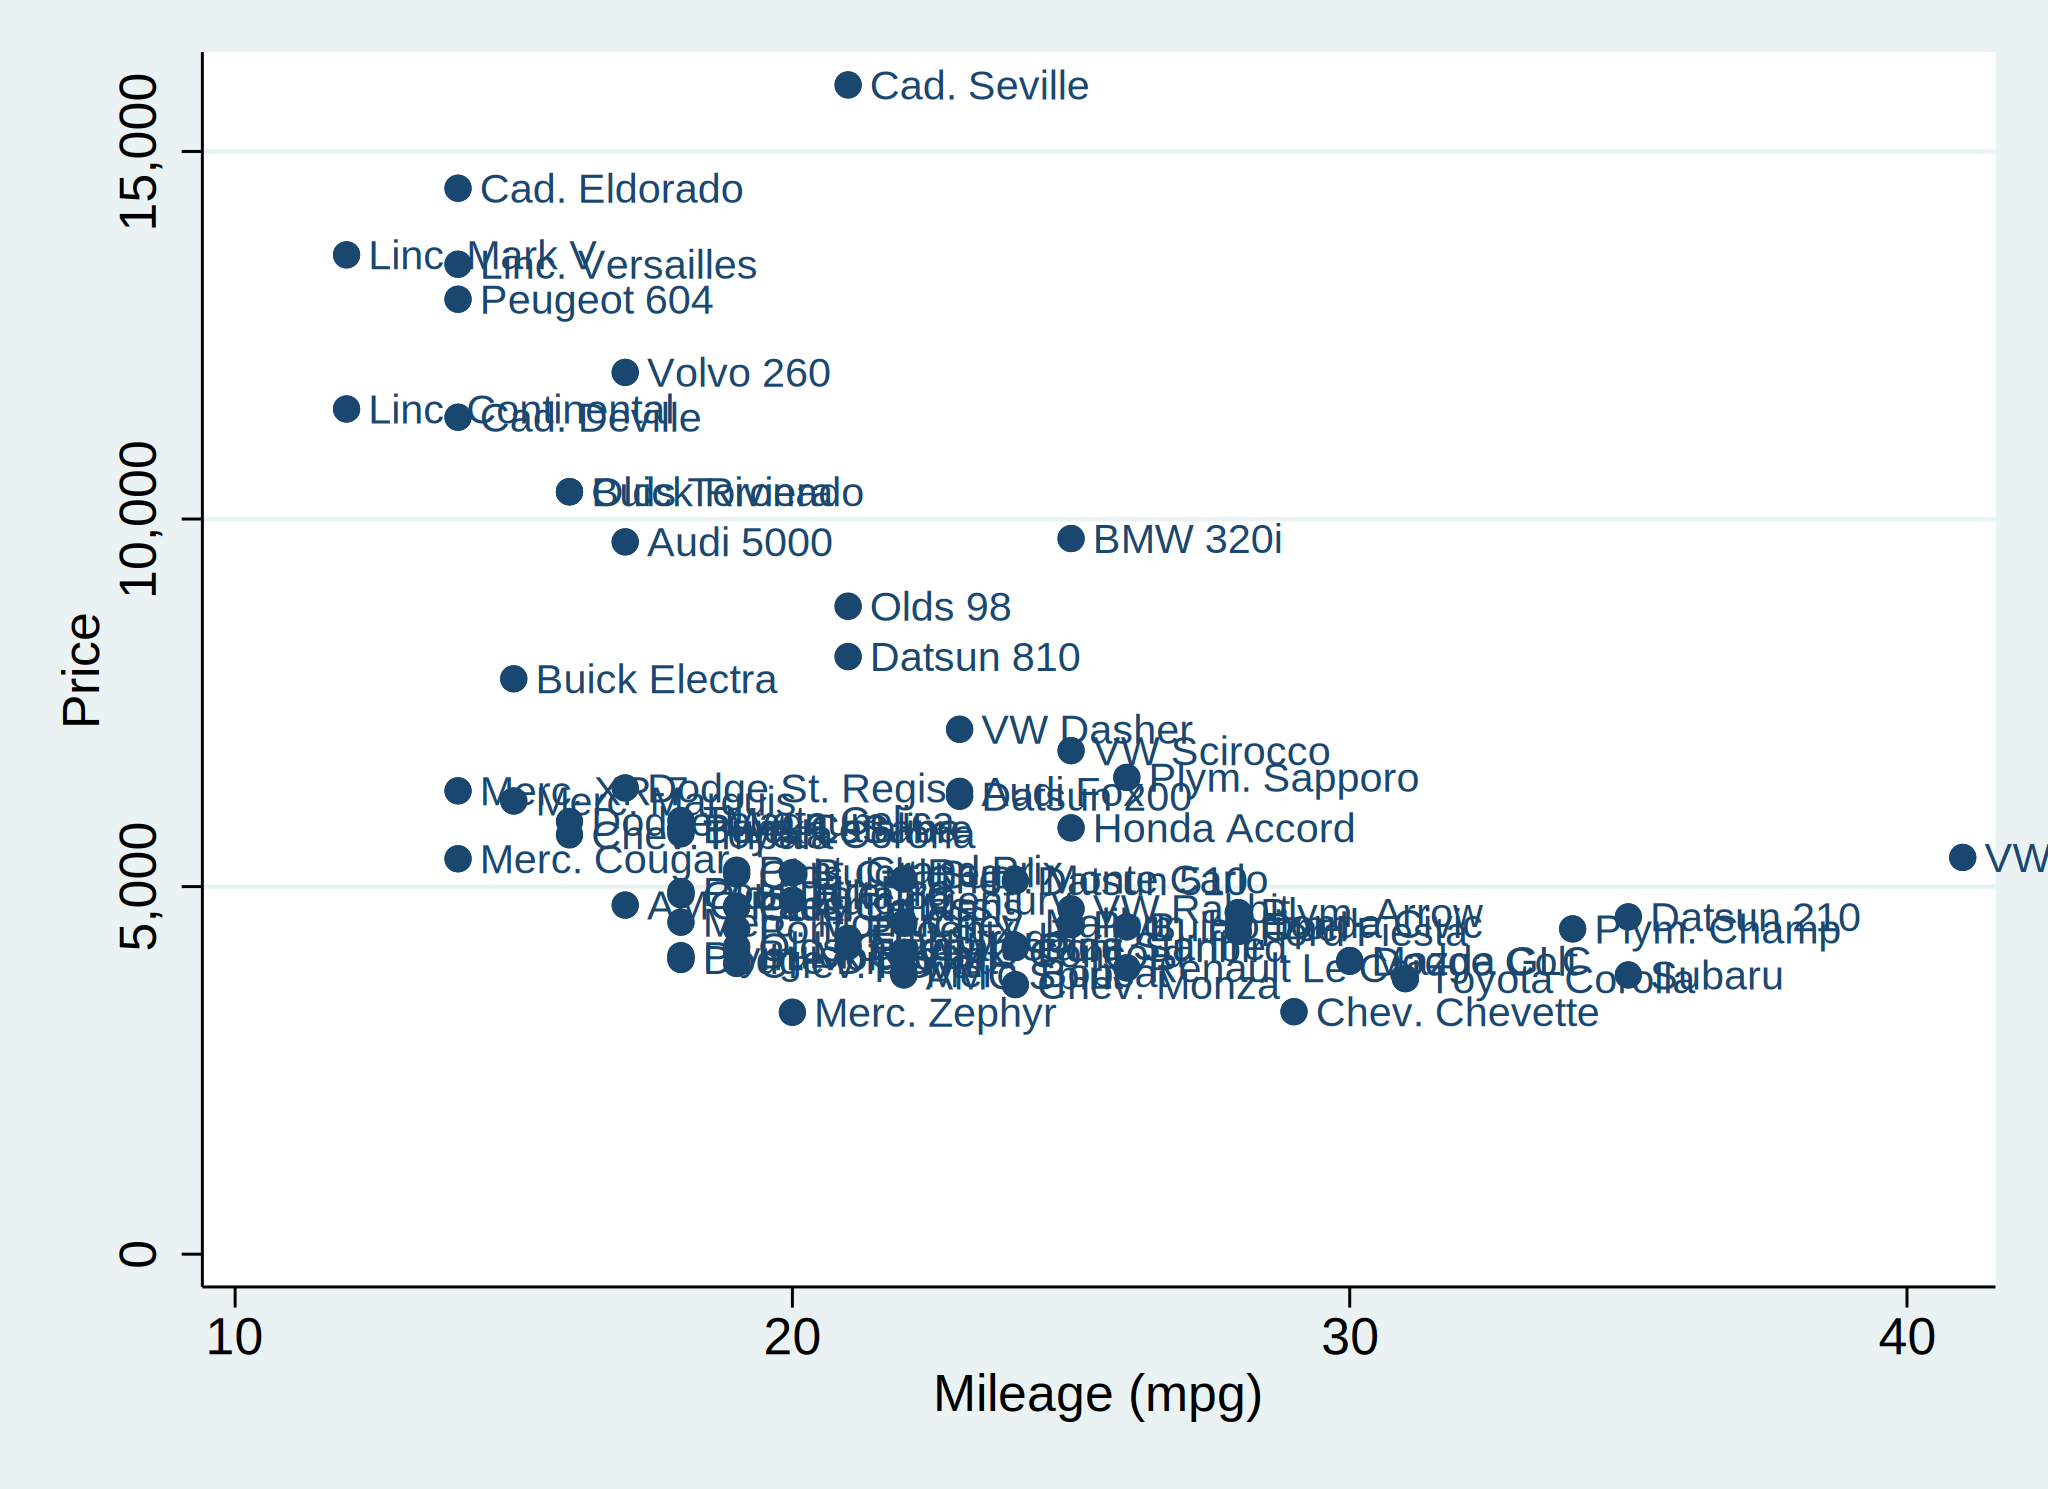

In [12]:
%%stata
scatter price mpg, mlabel(make)
graph export "../outputs/images/price-mpg.png", replace

> **Store current e() results into a dictionary named `mydictionary`**

In [10]:
%%stata -eret mydictionary
reg mpg price i.foreign
ereturn list


. reg mpg price i.foreign

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     23.01
       Model |  960.866305         2  480.433152   Prob > F        =    0.0000
    Residual |  1482.59315        71  20.8815937   R-squared       =    0.3932
-------------+----------------------------------   Adj R-squared   =    0.3761
       Total |  2443.45946        73  33.4720474   Root MSE        =    4.5696

------------------------------------------------------------------------------
         mpg | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       price |   -.000959   .0001815    -5.28   0.000     -.001321    -.000597
             |
     foreign |
    Foreign  |   5.245271   1.163592     4.51   0.000     2.925135    7.565407
       _cons |   25.65058   1.271581    20.17   0.000     23.11512    28

In [11]:
mydictionary

{'e(N)': 74.0,
 'e(df_m)': 2.0,
 'e(df_r)': 71.0,
 'e(F)': 23.007494485746342,
 'e(r2)': 0.39324012569622946,
 'e(rmse)': 4.569638248831391,
 'e(mss)': 960.8663049714787,
 'e(rss)': 1482.5931544879809,
 'e(r2_a)': 0.3761482982510528,
 'e(ll)': -215.90831771275379,
 'e(ll_0)': -234.39433764823468,
 'e(rank)': 3.0,
 'e(cmdline)': 'regress mpg price i.foreign',
 'e(title)': 'Linear regression',
 'e(marginsprop)': 'minus',
 'e(marginsok)': 'XB default',
 'e(vce)': 'ols',
 'e(depvar)': 'mpg',
 'e(cmd)': 'regress',
 'e(properties)': 'b V',
 'e(predict)': 'regres_p',
 'e(model)': 'ols',
 'e(estat_cmd)': 'regress_estat',
 'e(b)': array([[-9.59034169e-04,  0.00000000e+00,  5.24527100e+00,
          2.56505843e+01]]),
 'e(V)': array([[ 3.29592449e-08,  0.00000000e+00, -1.02918123e-05,
         -2.00142479e-04],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         -0.00000000e+00],
        [-1.02918123e-05,  0.00000000e+00,  1.35394617e+00,
         -3.39072871e-01],
        [-2.0

In [12]:
mydictionary['e(V)']

array([[ 3.29592449e-08,  0.00000000e+00, -1.02918123e-05,
        -2.00142479e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00],
       [-1.02918123e-05,  0.00000000e+00,  1.35394617e+00,
        -3.39072871e-01],
       [-2.00142479e-04, -0.00000000e+00, -3.39072871e-01,
         1.61691892e+00]])

> **Integrate Stata with Mata**

While Stata is sufficient for day-to-day use, and is smart enough to understand generic commands, Mata, a low level language, is faster, and more agile than Stata.

In [13]:
%%mata
/* function to create an nxn identity matrix */
real matrix id(real scalar n)
{
    real scalar i
    real matrix res
 
    res = J(n, n, 0)
    for (i=1; i<=n; i++) {
        res[i,i] = 1
    }
    return(res)
}
 
/* create a 3x3 indentity matrix */
A = id(3)
A


. mata
------------------------------------------------- mata (type end to exit) -----
: /* function to create an nxn identity matrix */
: real matrix id(real scalar n)
> {
>     real scalar i
>     real matrix res
>  
>     res = J(n, n, 0)
>     for (i=1; i<=n; i++) {
>         res[i,i] = 1
>     }
>     return(res)
> }

:  
: /* create a 3x3 indentity matrix */
: A = id(3)

: A
[symmetric]
       1   2   3
    +-------------+
  1 |  1          |
  2 |  0   1      |
  3 |  0   0   1  |
    +-------------+

: end
-------------------------------------------------------------------------------

. 


One of the most common uses of Mata is to use data from Stata to do some regression analysis using matrix algebra. Here a standard example is to do a simple OLS in Mata.

Recall:
$$\beta = (X’X)^{(-1)} X’y$$

Steps:


1) load the auto dataset. 
2) the dependent variable is imported as the $y$ vector, the independent variables are imported as the $X$ matrix. 
3) This $X$ matrix is appended with a column vector of ones for the intercept. Since Stata shows the intercept at the end of regression tables, the vector of ones is appended at the end of $X$ but this can be prepended as well. Since the vector of ones should have the same number of rows as the X matrix, note the use of the J() operator.

Calculate:
+ beta coefficients:
$$(X'X)^-1 *(X'y)$$
+ squared error term:
$$e_i^2=(y_i — b x_i)^2$$
+ variance covariance matrix:
$$V=(X'X)^{(-1)} * \sum_i\frac{(e_i^2)}{n-k}$$
+ standard errors


In [14]:
%%mata
y = st_data(.,"price")
X = st_data(.,("mpg", "weight"))
X = X, J(rows(X),1,1)
beta   = invsym(cross(X,X))*cross(X,y)
esq    = (y - X*beta) :^ 2
V      = (sum(esq)/(rows(X)-cols(X)))*invsym(cross(X,X))
stderr = sqrt(diagonal(V))
st_matrix("b", beta)
st_matrix("se", stderr)


. mata
------------------------------------------------- mata (type end to exit) -----
: y = st_data(.,"price")

: X = st_data(.,("mpg", "weight"))

: X = X, J(rows(X),1,1)

: beta   = invsym(cross(X,X))*cross(X,y)

: esq    = (y - X*beta) :^ 2

: V      = (sum(esq)/(rows(X)-cols(X)))*invsym(cross(X,X))

: stderr = sqrt(diagonal(V))

: st_matrix("b", beta)

: st_matrix("se", stderr)

: end
-------------------------------------------------------------------------------

. 


+ Let’s compare our outputs

In [15]:
%%mata
/* Mata variables stored in memory */
mata: beta
mata: stderr
/*Stata matrices exported from Mata */
mat li b
mat li se



. mata
------------------------------------------------- mata (type end to exit) -----
: /* Mata variables stored in memory */
: mata: beta
                  1
    +----------------+
  1 |  -49.51222067  |
  2 |   1.746559158  |
  3 |   1946.068668  |
    +----------------+

: mata: stderr
                 1
    +---------------+
  1 |  86.15603887  |
  2 |  .6413537894  |
  3 |  3597.049599  |
    +---------------+

: /*Stata matrices exported from Mata */
: mat li b
invalid expression
r(3000);

: mat li se
invalid expression
r(3000);

: end
-------------------------------------------------------------------------------

. 


In [16]:
%%stata
/* Stata regression */
regress price mpg weight


. /* Stata regression */
. regress price mpg weight

      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     14.74
       Model |   186321280         2  93160639.9   Prob > F        =    0.0000
    Residual |   448744116        71  6320339.67   R-squared       =    0.2934
-------------+----------------------------------   Adj R-squared   =    0.2735
       Total |   635065396        73  8699525.97   Root MSE        =      2514

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -49.51222   86.15604    -0.57   0.567    -221.3025     122.278
      weight |   1.746559   .6413538     2.72   0.008      .467736    3.025382
       _cons |   1946.069    3597.05     0.54   0.590    -5226.245    9118.3

> **Save dataset as a Pandas Dataframe**

Here we save the auto.dta into memory as a pandas dataframe, to manipulate it using Python code

In [17]:
%%stata -doutd df
sysuse auto.dta

(1978 automobile data)


> **Interactive scatterplot**

In [18]:
df['mpg_sq'] = df.mpg ** 2

In [19]:
fig = px.scatter(x=df.mpg, y=df.price,  title="Scatter Plot").update_layout(
    xaxis_title=r"$\text{Mileage}$", yaxis_title="Price"
)
fig.show()

In [20]:
fig = px.scatter(x=df.mpg_sq, y=df.price,  title="Scatter Plot").update_layout(
    xaxis_title=r"$\text{Mileage}^2$", yaxis_title="Price"
)
fig.show()

> **Load Pandas Dataframe into Stata

In [21]:
%%stata -d df
reg                   ///
    price             ///
    mpg               ///
    mpg_sq            ///
    rep78             ///
    headroom          ///
    trunk             ///
    weight            ///
    length            ///
    turn              ///
    displacement      ///
    gear_ratio        ///
    foreign, r



. reg                   ///
>     price             ///
>     mpg               ///
>     mpg_sq            ///
>     rep78             ///
>     headroom          ///
>     trunk             ///
>     weight            ///
>     length            ///
>     turn              ///
>     displacement      ///
>     gear_ratio        ///
>     foreign, r

Linear regression                               Number of obs     =         69
                                                F(11, 57)         =      10.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.6002
                                                Root MSE          =     2011.4

------------------------------------------------------------------------------
             |               Robust
       price | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+-----------------------------------------

# 4. Interact with pystata

> **Import pystata**

In [22]:
from pystata import stata

In [23]:
stata.pdataframe_to_data(df, force=True)

> **Summarize data**

In [24]:
stata.run('summarize')


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------------------
  gear_ratio |         74    3.014865

> **Label variables**

In [25]:
stata.run('''
label variable mpg "Mileage"
label define foreign 1 "Yes" 0 "No", replace
''')



. 
. label variable mpg "Mileage"

. label define foreign 1 "Yes" 0 "No", replace

. 


> **Run regression**

In [26]:
stata.run('''regress price mpg weight''')


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     14.74
       Model |   186321280         2  93160639.9   Prob > F        =    0.0000
    Residual |   448744116        71  6320339.67   R-squared       =    0.2934
-------------+----------------------------------   Adj R-squared   =    0.2735
       Total |   635065396        73  8699525.97   Root MSE        =      2514

------------------------------------------------------------------------------
       price | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
         mpg |  -49.51222   86.15604    -0.57   0.567    -221.3025     122.278
      weight |   1.746559   .6413538     2.72   0.008      .467736    3.025382
       _cons |   1946.069    3597.05     0.54   0.590    -5226.245    9118.382
--------------------------------------------------

In [27]:
myereturn = stata.get_ereturn()
myereturn['e(b)'], myereturn['e(V)']

(array([[-4.95122207e+01,  1.74655916e+00,  1.94606867e+03]]),
 array([[ 7.42286303e+03,  4.46016592e+01, -2.92759823e+05],
        [ 4.46016592e+01,  4.11334683e-01, -2.19190320e+03],
        [-2.92759823e+05, -2.19190320e+03,  1.29387658e+07]]))